In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
%matplotlib inline

In [0]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

In [0]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

In [0]:
df = pd.read_csv('New Text Document.txt')

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,...,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0.0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,...,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0.0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830578,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,...,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0.0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,0.789256,...,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0.0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,0.739669,0.739669,0.764463,0.756198,0.764463,0.785124,0.793388,0.797521,0.814050,0.809917,0.809917,0.818182,0.830578,0.830578,0.842975,0.838843,0.838843,0.838843,0.830578,0.818182,0.805785,0.801653,0.797521,0.793388,0.793388,0.785124,0.797521,0.801653,0.793388,0.793388,...,0.557851,0.574380,0.595041,0.599174,0.611570,0.623967,0.636364,0.669422,0.681818,0.698347,0.698347,0.714876,0.710744,0.764463,0.756198,0.785124,0.797521,0.739669,0.714876,0.681818,0.619835,0.293388,0.144628,0.152893,0.152893,0.157025,0.148760,0.161157,0.161157,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0.0


In [0]:
labels = df['target']

In [0]:
pixels = df.drop(['target'], axis=1)

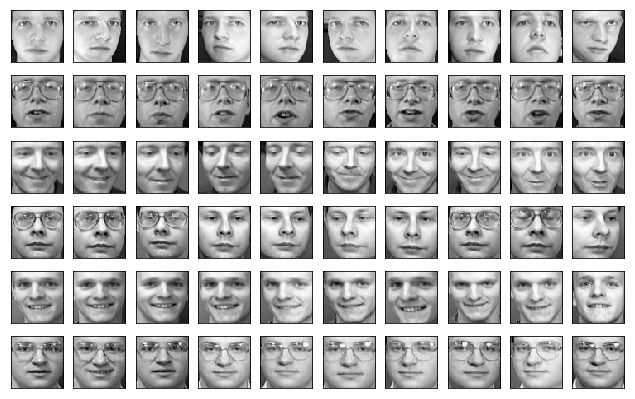

In [10]:
show_orignal_images(pixels)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.3)

In [0]:
pca = PCA(n_components=120).fit(X_train)

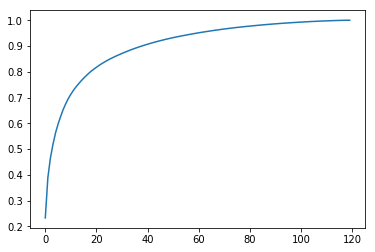

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

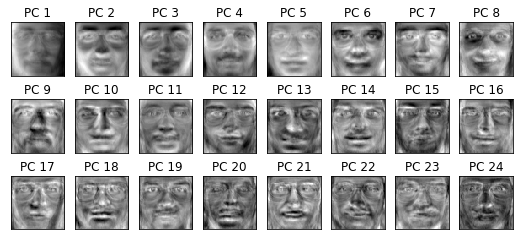

In [22]:
show_eigenfaces(pca)

In [0]:
x_train_pca = pca.transform(X_train)

In [0]:
clf = SVC(kernel='rbf', C=1000, gamma=0.01)

In [0]:
clf = clf.fit(x_train_pca,y_train)

In [0]:
 x_test_pca = pca.transform(X_test.dropna())

In [0]:
y_pred =clf.predict(x_test_pca)

In [33]:
print(classification_report(y_test.dropna(), y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         2
         7.0       0.75      1.00      0.86         3
         8.0       1.00      1.00      1.00         5
         9.0       1.00      0.80      0.89         5
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         3
        12.0       1.00      1.00      1.00         1
        13.0       1.00      1.00      1.00         4
        14.0       1.00      1.00      1.00         6
        15.0       1.00      0.80      0.89         5
        16.0       1.00      1.00      1.00         1

    accuracy                           0.96        51
   macro avg       0.97   